In [0]:
!pip install kaggle

In [0]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!mkdir -p /root/.kaggle/
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle competitions download -c facial-keypoints-detection

  0% 0.00/201k [00:00<?, ?B/s]
100% 201k/201k [00:00<00:00, 75.3MB/s]
  0% 0.00/843k [00:00<?, ?B/s]
100% 843k/843k [00:00<00:00, 81.7MB/s]
 88% 14.0M/16.0M [00:00<00:00, 44.8MB/s]
100% 16.0M/16.0M [00:00<00:00, 63.5MB/s]
 68% 41.0M/60.1M [00:00<00:00, 185MB/s]
100% 60.1M/60.1M [00:00<00:00, 173MB/s]


In [0]:
!ls

IdLookupTable.csv  sample_data		 test.zip
kaggle.json	   SampleSubmission.csv  training.zip


In [0]:
!unzip training.zip
!unzip test.zip

Archive:  training.zip
  inflating: training.csv            
Archive:  test.zip
  inflating: test.csv                


In [0]:
!ls

IdLookupTable.csv  sample_data		 test.csv  training.csv
kaggle.json	   SampleSubmission.csv  test.zip  training.zip


Preprocessing training data!

In [0]:
import pandas as pd
df = pd.read_csv("training.csv")

In [0]:
df.head(1).T

,0
left_eye_center_x,66.0336
left_eye_center_y,39.0023
right_eye_center_x,30.227
right_eye_center_y,36.4217
left_eye_inner_corner_x,59.5821
left_eye_inner_corner_y,39.6474
left_eye_outer_corner_x,73.1303
left_eye_outer_corner_y,39.97
right_eye_inner_corner_x,36.3566
right_eye_inner_corner_y,37.3894


In [0]:
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [0]:
df.fillna(df.mean(), inplace = True)

In [0]:
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [0]:
df.to_csv('training_modified.csv', index = False)

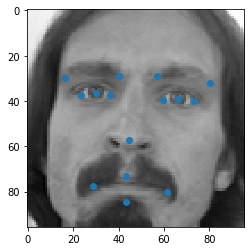

In [0]:
import matplotlib.pyplot as plt
import numpy as np

image = df.loc[0, 'Image']
x = df.iloc[0, 0:-1]
image = np.array(image.split(' '), dtype = np.float)
plt.imshow(image.reshape(96,96), cmap = 'gray')
plt.scatter(x[0::2],x[1::2])
plt.show()

Testing the testing dataset!

In [0]:
test_df = pd.read_csv("test.csv", index_col='ImageId')

In [0]:
test_df.isnull().sum()

Image    0
dtype: int64

In [0]:
test_df.head()

,Image
ImageId,
1,182 183 182 182 180 180 176 169 156 137 124 10...
2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
3,177 176 174 170 169 169 168 166 166 166 161 14...
4,176 174 174 175 174 174 176 176 175 171 165 15...
5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


Checking modified training dataset! Planning to split it into training and validation dataset!

In [0]:
df = pd.read_csv("training_modified.csv")

In [0]:
df.head(1).T

,0
left_eye_center_x,66.0336
left_eye_center_y,39.0023
right_eye_center_x,30.227
right_eye_center_y,36.4217
left_eye_inner_corner_x,59.5821
left_eye_inner_corner_y,39.6474
left_eye_outer_corner_x,73.1303
left_eye_outer_corner_y,39.97
right_eye_inner_corner_x,36.3566
right_eye_inner_corner_y,37.3894


Building custom dataset!

In [0]:
!pwd

/content


In [0]:
!ls /content

IdLookupTable.csv  SampleSubmission.csv  training.csv
kaggle.json	   test.csv		 training_modified.csv
sample_data	   test.zip		 training.zip


In [0]:
import torch
import torch.nn.functional as F
import os
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.dataframe = pd.read_csv(os.path.join(self.root_dir,csv_file))
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        landmarks = self.dataframe.iloc[idx, 0:-1]
        landmarks = np.array(landmarks)
        landmarks = landmarks.astype('float')

        image = self.dataframe.loc[idx, 'Image'].split(' ')
        image = np.array(list(map(int, image))).reshape(96,96)
        image = np.expand_dims(image, 2)
  
        sample = {'image':image,
                  'landmarks':landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample['image'], sample['landmarks']

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = np.transpose(image, (2, 0, 1))
        image = np.array(image/255)
        image = image.astype('float')
        image, landmarks = torch.from_numpy(image), torch.from_numpy(landmarks)
        
        return {'image':image,
                'landmarks':landmarks}

class Normalize(object):
    def __init__(self, mean, std):
        self.mean = mean[0]
        self.std = std[0]

    def __call__(self, sample):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.

        Returns:
            Tensor: Normalized Tensor image.
        """
        image, landmarks = sample['image'], sample['landmarks']
        image = (image - self.mean)/self.std

        return {'image':image,
                'landmarks':landmarks}


In [0]:
face_dataset = FaceLandmarksDataset(csv_file='training_modified.csv',
                                    root_dir = '/content',
                                    transform = transforms.Compose([ToTensor(),
                                                                    Normalize((0.5,),(0.5,))]) )

In [0]:
from torch.utils.data.sampler import SubsetRandomSampler

torch.manual_seed(29)

train_validation_split = 0.7
dataset_size = face_dataset.__len__()
indices = np.arange(dataset_size)
np.random.shuffle(indices)

split = int(np.floor(train_validation_split * dataset_size))
train_idx, valid_idx = indices[:split], indices[split:]

train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(valid_idx)


train_loader = torch.utils.data.DataLoader(face_dataset, batch_size = 32, sampler = train_sampler)
validation_loader = torch.utils.data.DataLoader(face_dataset, batch_size = 32, sampler = validation_sampler)

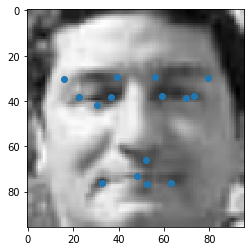

In [0]:
iterator = iter(train_loader)
images, landmarks = iterator.next()
image, landmarkForImage = images[0], landmarks[0]
#image = image*0.5 + 0.5
#print(image)
plt.imshow(np.squeeze(image.numpy()), cmap = 'gray')
plt.scatter(landmarkForImage[0::2], landmarkForImage[1::2])

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        
        self.conv2 = nn.Conv2d(16, 64, 3, padding=1)
 
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(128 * 12 * 12, 500)
        
        self.fc2 = nn.Linear(500, 30)
        
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(x.shape[0], -1)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

# create a complete CNN
model = Net()


# move tensors to GPU if CUDA is available
model.to('cuda')

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=18432, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=30, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [0]:
import torch.optim as optim
criterion = nn.MSELoss()
optimiser = optim.Adam(model.parameters())

In [0]:
#train and validation

train_loss_list = list()
validation_loss_list = list()
validationloss_min = np.Inf
epochs = 275

for epoch in range(epochs):
  running_train_loss = 0
  model.train()
  for images, landmarks in train_loader:
    images, landmarks = images.float().to('cuda'), landmarks.float().to('cuda')
    optimiser.zero_grad()
    output = model(images)
    loss = criterion(output, landmarks)
    running_train_loss += loss.item()
    loss.backward()
    optimiser.step()
  else:
    avg_train_loss = running_train_loss/len(train_loader.sampler)
    train_loss_list.append(avg_train_loss)

  running_validation_loss = 0
  accuracy = 0
  model.eval()
  with torch.no_grad():
    for images, landmarks in validation_loader:
      images, landmarks = images.float().to('cuda'), landmarks.float().to('cuda')
      output = model(images)
      loss = criterion(output, landmarks)
      running_validation_loss += loss.item()

    else:
      avg_validation_loss = running_validation_loss/len(validation_loader.sampler)
      if avg_validation_loss <= validationloss_min:
        validationloss_min = avg_validation_loss
        torch.save(model.state_dict(), 'facelandmarks.pth')
      validation_loss_list.append(avg_validation_loss)
  
  print(f"For the epoch {epoch+1}/{epochs}",
        f"Training loss is {avg_train_loss}",
        f"Validation loss is {avg_validation_loss}")

    
    

For the epoch 1/275 Training loss is 4.268571077400149 Validation loss is 0.4016870237129518
For the epoch 2/275 Training loss is 0.6817476692400725 Validation loss is 0.2828734424942774
For the epoch 3/275 Training loss is 0.5725474711318803 Validation loss is 0.24228793362917347
For the epoch 4/275 Training loss is 0.5054553035400539 Validation loss is 0.2649781998167647
For the epoch 5/275 Training loss is 0.49276621872276055 Validation loss is 0.37373466559335694
For the epoch 6/275 Training loss is 0.46614114388696665 Validation loss is 0.24424453153677866
For the epoch 7/275 Training loss is 0.4729205123026167 Validation loss is 0.2583462694857983
For the epoch 8/275 Training loss is 0.4599214474778935 Validation loss is 0.4125959766108375
For the epoch 9/275 Training loss is 0.42627106043410096 Validation loss is 0.37561349778592446
For the epoch 10/275 Training loss is 0.4508375834490927 Validation loss is 0.27314535100409326
For the epoch 11/275 Training loss is 0.405841638068

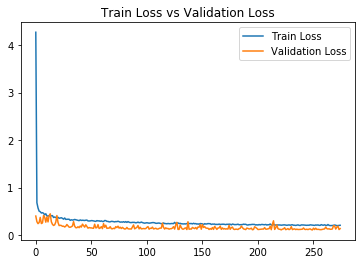

In [0]:

plt.plot(train_loss_list, label = 'Train Loss')
plt.plot(validation_loss_list, label = 'Validation Loss')
plt.title("Train Loss vs Validation Loss")
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Generated!')

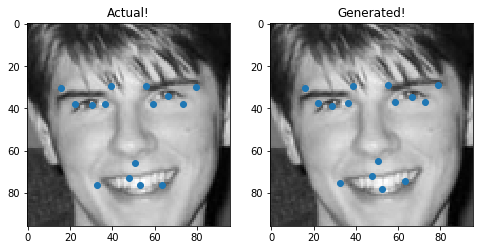

In [0]:
torch.manual_seed(25)
model.load_state_dict(torch.load('facelandmarks.pth'))
model.eval()
iterator = iter(validation_loader)
images, landmarks = iterator.next()
landmarksGenerated = model(images.float().to('cuda'))
idx = np.random.randint(0,31)
image, landmarkForImageOriginal, landmarkForImageGenerated = images[idx]*0.5 + 0.5, landmarks[idx], landmarksGenerated[idx]

plt.figure(figsize=(8,8))
ax1 = plt.subplot(1,2,1)
ax1.imshow(np.squeeze(image.cpu().numpy()), cmap = 'gray')
ax1.scatter(landmarkForImageOriginal.cpu().numpy()[0::2], landmarkForImageOriginal.cpu().numpy()[1::2])
ax1.set_title("Actual!")


ax2 = plt.subplot(1,2,2)
ax2.imshow(np.squeeze(image.cpu().numpy()), cmap = 'gray')
ax2.scatter(landmarkForImageGenerated.cpu().detach().numpy()[0::2], landmarkForImageGenerated.cpu().detach().numpy()[1::2])
ax2.set_title("Generated!")

 
